In [1]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
from matplotlib import dates as mpl_dates
df = pd.read_csv('SLEEP/data.csv')
df['lastSyncTime']=df['lastSyncTime'].apply(dt.fromtimestamp)
df['start']=df['start'].apply(dt.fromtimestamp)
df['stop']=df['stop'].apply(dt.fromtimestamp)
zerosleep = df.shallowSleepTime==0
df.drop(index=df[zerosleep].index,inplace=True)
df['date']=pd.to_datetime(df['date'])
pd.set_option('display.max_rows',200)

In [2]:
df.set_index('date',inplace=True)

In [3]:
df.head()

,lastSyncTime,deepSleepTime,shallowSleepTime,wakeTime,start,stop
date,,,,,,
2019-12-17,2019-12-18 06:23:24,110,319,0,2019-12-16 23:30:00,2019-12-17 06:39:00
2019-12-18,2019-12-19 06:15:19,91,306,0,2019-12-17 23:23:00,2019-12-18 06:00:00
2019-12-19,2019-12-20 06:39:32,133,261,0,2019-12-18 23:24:00,2019-12-19 05:58:00
2019-12-20,2019-12-21 00:00:36,100,268,0,2019-12-19 23:48:00,2019-12-20 05:56:00
2019-12-21,2019-12-22 07:49:33,88,273,0,2019-12-20 23:57:00,2019-12-21 05:58:00


In [4]:
jantofeb=df['2020-01':'2020-02'] #To get all data from january and february

In [5]:
jantofeb.head()

,lastSyncTime,deepSleepTime,shallowSleepTime,wakeTime,start,stop
date,,,,,,
2020-01-12,2020-01-13 08:44:19,69,390,0,2020-01-12 00:11:00,2020-01-12 07:50:00
2020-01-13,2020-01-14 08:54:50,108,410,0,2020-01-12 23:59:00,2020-01-13 08:37:00
2020-01-14,2020-01-15 08:21:43,0,187,49,2020-01-14 03:15:00,2020-01-14 07:11:00
2020-01-15,2020-01-16 00:15:09,111,447,0,2020-01-14 23:00:00,2020-01-15 08:18:00
2020-01-16,2020-01-17 00:14:07,21,513,0,2020-01-15 22:35:00,2020-01-16 07:29:00


In [6]:
df['totalSleepTime']=df['deepSleepTime']+df['shallowSleepTime']
#Adds column totalSleepTime which is sum of deepSleepTime and shallowSleepTime
df['DayOfWeek']=df['stop'].dt.day_name() #Adding new column named DayOfWeek

In [7]:
df.head()

,lastSyncTime,deepSleepTime,shallowSleepTime,wakeTime,start,stop,totalSleepTime,DayOfWeek
date,,,,,,,,
2019-12-17,2019-12-18 06:23:24,110,319,0,2019-12-16 23:30:00,2019-12-17 06:39:00,429,Tuesday
2019-12-18,2019-12-19 06:15:19,91,306,0,2019-12-17 23:23:00,2019-12-18 06:00:00,397,Wednesday
2019-12-19,2019-12-20 06:39:32,133,261,0,2019-12-18 23:24:00,2019-12-19 05:58:00,394,Thursday
2019-12-20,2019-12-21 00:00:36,100,268,0,2019-12-19 23:48:00,2019-12-20 05:56:00,368,Friday
2019-12-21,2019-12-22 07:49:33,88,273,0,2019-12-20 23:57:00,2019-12-21 05:58:00,361,Saturday


In [8]:
df['stop'].min()

Timestamp('2019-12-17 06:39:00')

In [9]:
df['stop'].max()

Timestamp('2020-04-10 09:12:00')

In [11]:
df['stop'].max()-df['stop'].min()
# To know howmany days of data is present

Timedelta('115 days 02:33:00')

In [12]:
filt = (df['stop'].dt.month==2)
df.loc[filt].head()
#To filter and display only 2nd month data

,lastSyncTime,deepSleepTime,shallowSleepTime,wakeTime,start,stop,totalSleepTime,DayOfWeek
date,,,,,,,,
2020-02-01,2020-02-02 06:30:12,132,267,0,2020-01-31 23:48:00,2020-02-01 06:27:00,399,Saturday
2020-02-02,2020-02-03 00:06:11,140,363,0,2020-02-01 23:38:00,2020-02-02 08:01:00,503,Sunday
2020-02-04,2020-02-05 06:19:00,203,340,2,2020-02-03 23:12:00,2020-02-04 08:17:00,543,Tuesday
2020-02-05,2020-02-06 06:29:12,116,307,0,2020-02-04 23:09:00,2020-02-05 06:12:00,423,Wednesday
2020-02-06,2020-02-07 06:22:12,159,241,0,2020-02-05 23:22:00,2020-02-06 06:02:00,400,Thursday


In [13]:
#df['stop'].dt.month

In [14]:
df['2020-01']['totalSleepTime'].mean() #Average sleep time of January month

448.1764705882353

In [16]:
filt1=(df['start'].dt.hour==1) #Slept after One O'Clock
df.loc[filt1]

,lastSyncTime,deepSleepTime,shallowSleepTime,wakeTime,start,stop,totalSleepTime,DayOfWeek
date,,,,,,,,
2020-03-31,2020-04-01 09:47:07,89,386,53,2020-03-31 01:02:00,2020-03-31 09:50:00,475,Tuesday
2020-04-06,2020-04-07 00:01:37,50,329,79,2020-04-06 01:30:00,2020-04-06 09:08:00,379,Monday
2020-03-31,2020-04-01 09:47:07,89,386,53,2020-03-31 01:02:00,2020-03-31 09:50:00,475,Tuesday
2020-04-06,2020-04-07 00:01:37,50,329,79,2020-04-06 01:30:00,2020-04-06 09:08:00,379,Monday


In [17]:
week_avg=df['totalSleepTime'].resample('W').mean()

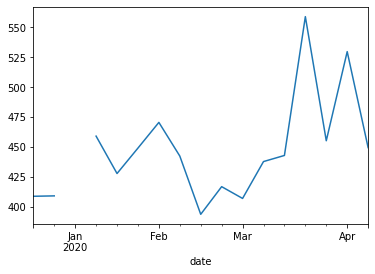

In [18]:
week_avg.plot()

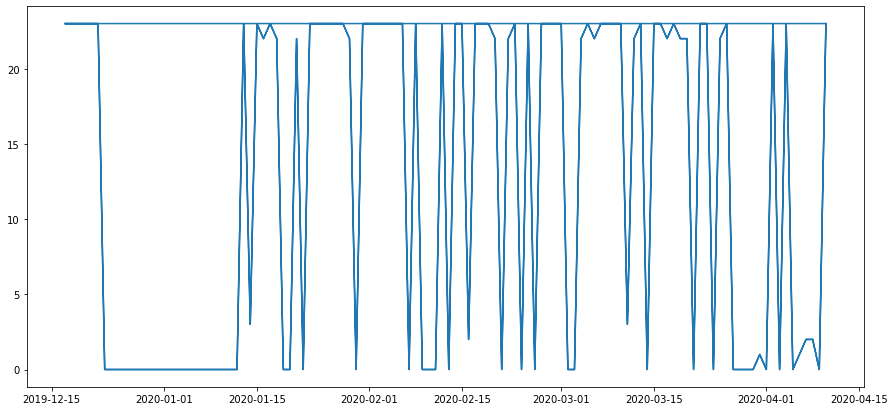

In [19]:
times=df['start'].dt.hour
plt.figure(figsize=(15,7))
plt.plot(times)

In [ ]:
tot = df.loc[filt,'totalSleepTime']
deep = df.loc[filt,'deepSleepTime']
light = df.loc[filt,'shallowSleepTime']

In [ ]:
plt.figure(figsize=(15,7))
tot.plot.bar(color='#444444')
light.plot.bar(color='#008fd5')
deep.plot.bar(color='#f54257')
date_format = mpl_dates.DateFormatter('%b, %d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Minutes Slept')
plt.title('Sleep Analysis')
plt.legend(['Total sleep','Light sleep','Deep sleep'])

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(days),tot)
plt.plot(np.arange(days),light)
plt.plot(np.arange(days),deep)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Minutes Slept')
plt.title('Sleep Analysis')
plt.legend(['Total sleep','Light sleep','Deep sleep'])
plt.savefig('sleep.png')